# Build the Neural Network

Neural networks comprise of layers/modules that perform operations on data. The torch.nn namespace provides all the building blocks you need to build your own neural network. Every module in PyTorch subclasses the nn.Module. A neural network is a module itself that consists of other modules (layers). This nested structure allows for building and managing complex architectures easily.

In [1]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
# select device

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


# Define the Class

We define our neural network by subclassing nn.Module, and initialize the neural network layers in `__init__`. Every nn.Module subclass implements the operations on input data in the forward method.

In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [4]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
X = torch.rand(100, 28, 28, device=device)


In [21]:

logits = model(X)

pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 5, 2, 2, 3, 3, 3, 3, 2, 2, 2, 9, 3, 3,
        3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3,
        2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 5, 3, 2, 3, 3,
        2, 3, 3, 3, 3, 2, 8, 3, 3, 2, 9, 2, 3, 3, 2, 2, 2, 5, 3, 9, 3, 3, 2, 3,
        2, 3, 2, 2], device='cuda:0')


In [22]:
sample_input_i = 5
class_j = 2

# probability (or model output?) for input sample i being in class j

pred_probab[sample_input_i, class_j].item()

0.10914817452430725

In [23]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [24]:
import matplotlib.pyplot as plt

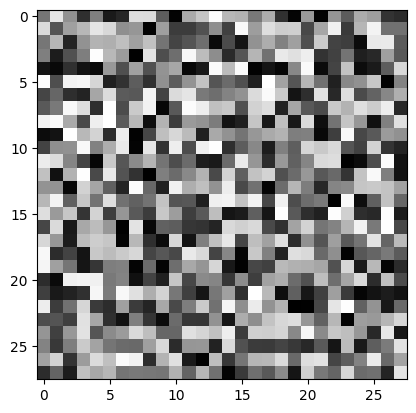

In [26]:
plt.imshow(input_image[1].squeeze(), cmap="gray")

In [27]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [28]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [29]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.1450,  0.2874,  0.0013,  0.2169,  0.2097, -0.5973, -0.1007,  0.0153,
         -0.2563,  0.1335, -0.0757,  0.3387,  0.3183, -0.3178, -0.0325,  0.2329,
          0.0431,  0.3988,  0.1274,  0.0341],
        [-0.1735, -0.0359,  0.1329,  0.1088,  0.3268, -0.6582,  0.3052, -0.3027,
         -0.2222,  0.1349, -0.2923,  0.0358,  0.0410, -0.0654, -0.1386,  0.0789,
          0.0997,  0.3692,  0.0746, -0.3563],
        [-0.6097,  0.3441,  0.2170,  0.3496,  0.1699, -0.6214,  0.0904, -0.4425,
         -0.4808, -0.1974, -0.2207, -0.0569,  0.1076,  0.0405, -0.3467, -0.1200,
         -0.3497,  0.0986,  0.2153,  0.0808]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.2874, 0.0013, 0.2169, 0.2097, 0.0000, 0.0000, 0.0153, 0.0000,
         0.1335, 0.0000, 0.3387, 0.3183, 0.0000, 0.0000, 0.2329, 0.0431, 0.3988,
         0.1274, 0.0341],
        [0.0000, 0.0000, 0.1329, 0.1088, 0.3268, 0.0000, 0.3052, 0.0000, 0.0000,
         0.1349, 0.0000, 0.0358, 0.0410, 0.0000, 0.00

In [119]:
input_image = torch.rand(3,28,28)
relu_2 = nn.ReLU()
linear_2 = nn.Linear(20, 10)

In [132]:
# testing to see if you can put softmax in the nn pipeline
seq_modules = nn.Sequential(
    flatten,
    layer1,
    relu_2,
    linear_2,
    nn.Softmax(dim=1)
)
seq_modules_2 = nn.Sequential(
    flatten,
    layer1,
    relu_2,
    linear_2,
)
output_with_softmax = seq_modules(input_image)
logits = seq_modules_2(input_image)
nn.Softmax(dim=1)(logits) - output_with_softmax

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], grad_fn=<SubBackward0>)

In [133]:
# using `model` from somewhere above..
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0348, -0.0246,  0.0019,  ...,  0.0040, -0.0035,  0.0269],
        [ 0.0192, -0.0156,  0.0167,  ..., -0.0061, -0.0035, -0.0289]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0158, -0.0236], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0133, -0.0216, -0.0432,  ..., -0.0141,  0.0098,  0.0093],
        [-0.0425,  0.0004,  0.0038,  ...,  0.0333, -0.0093,  0.0252]],
       device='cuda:0', grad_fn=<Sl

tensor([[0.1181, 0.1129, 0.0863, 0.1254, 0.0812, 0.0830, 0.1040, 0.0809, 0.1098,
         0.0983],
        [0.1168, 0.1144, 0.0727, 0.1194, 0.0828, 0.0773, 0.1021, 0.0822, 0.1271,
         0.1052],
        [0.1235, 0.1179, 0.0714, 0.1205, 0.0871, 0.0878, 0.0966, 0.0879, 0.1008,
         0.1066]], grad_fn=<SoftmaxBackward0>)